In [1]:
%matplotlib inline
import pandas as pd
import geopandas as gpd
import plotly
from IPython.display import display
from IPython.display import Image
import numpy as np
import warnings
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly_express as px
import math
import plotly

### Uploading My Data

The following is just to load in my cleaned datasets for income and diabetes counts from the Initial_Exploration_and_Cleaning folder.


In [2]:
diabetes2_geo_df=gpd.read_file('../../data/Raw_Data/Diabetes files/SimplyAnalytics_Shapefiles_2019-12-04_03_12_54_d74b88e522bf3f67df6cb463b492384f.shp')
diabetes2_geo_df=diabetes2_geo_df[['spatial_id', 'VALUE0', 'geometry']]
diabetes2_geo_df.columns = ['zipcode', 'Counts Diabetes', 'Geometry']

In [3]:
income_geo_df=gpd.read_file('/Commjhub/jupyterhub/comm318_fall2019/alidadig/COMM318_Final_Project/data/Raw_Data/Income files/SimplyAnalytics_Shapefiles_2019-12-03_05_13_16_89807a0551dabf581fad0dc3275f5cf9.shp')
cleaned_income_df=income_geo_df[['spatial_id', 'VALUE0', 'geometry']]
cleaned_income_df.columns = ['Zipcode', 'Median Income', 'geometry']

### Merging My Data

Now, I want to combine the two datasets to get one big dataset for diabetes counts and zipcodes. The two datasets align perfectly by zipcode so I don't need to reorder the income and diabetes counts columns in order to merge them accurately. The Income_Diabetes dataframe will be my combined dataset for median income level and diabetes counts for each zipcode. 

In [4]:
Income_Diabetes=pd.concat([cleaned_income_df, diabetes2_geo_df], axis=1)
Income_Diabetes.head()

,Zipcode,Median Income,geometry,zipcode,Counts Diabetes,Geometry
0,19102,84800.0,POLYGON ((-75.16728099999999 39.95825899907105...,19102,0.0000,POLYGON ((-75.16728099999999 39.95825899907105...
1,19103,78933.0,POLYGON ((-75.18090899999999 39.95298199907108...,19103,0.5980,POLYGON ((-75.18090899999999 39.95298199907108...
2,19104,27647.0,POLYGON ((-75.21206899999999 39.97021099907098...,19104,0.6768,POLYGON ((-75.21206899999999 39.97021099907098...
3,19106,112116.0,(POLYGON ((-75.14433099999998 39.9298249990712...,19106,0.9344,(POLYGON ((-75.14433099999998 39.9298249990712...
4,19107,63548.0,POLYGON ((-75.16402299999997 39.95162799907109...,19107,3.4211,POLYGON ((-75.16402299999997 39.95162799907109...


I want to reorganize the merged dataframe to only include one of the zipcode columns and one of the geometry columsn since it is redundant. 

In [5]:
Income_Diabetes=Income_Diabetes[['Zipcode', 'Median Income', 'Counts Diabetes', 'geometry']]

### Graphing My Merged Data

I now want to graph the merged dataset by plotting Counts Diabetes with Median Income to see the correlation. 

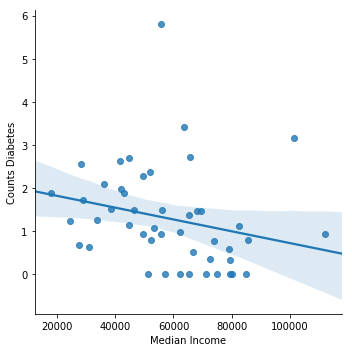

In [6]:
fig = sns.lmplot(y='Counts Diabetes', x='Median Income', data=Income_Diabetes)

In [7]:
fig.savefig("Income Diabetes Correlational Graph.png")

The above is used to save my graph as a png for my final presentation. 

### About This Data

* This map will be used to show the correlation between income level and diabetes counts in Philly areas by zipcode. 
* There is a clear correlation between lower income areas and higher diabetes counts. This is what I expected. 
* This graph will serve as the starting point for my research presentation. After displaying this correlation between lower income and higher diabetes counts, I will them begin to analyze the levels of access to healthy and unhealthy food to see if lower access to healthy food is a factor in determining why lower income areas have higher diabetes counts. 